In [18]:
import sys
sys.path.append('..')
from test_dali import LSTM, Mat, LSTMState #, StackedLSTM

import pickle
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
s = LSTMState(Mat([1,2,3]), Mat([4,2,1]))
print(s.dtype)
print(s.memory.w)
print(s.hidden.w)

float32
[[ 1.  2.  3.]]
[[ 4.  2.  1.]]


In [35]:
l = LSTM(2, 5)

In [11]:
i = Mat([[1, 2]])
h = l.initial_states()
print(i.__repr__())
print(h.hidden.__repr__())
print(h.memory.__repr__())
h = l.activate(i, h)
print(h.hidden.__repr__())
print(h.memory.__repr__())

[
    [  1.000   2.000]
]

[
    [  0.000   0.000   0.000   0.000   0.000]
]

[
    [  0.000   0.000   0.000   0.000   0.000]
]

[
    [ -0.168  -0.194  -0.186   0.132  -0.092]
]

[
    [ -0.407  -0.264  -0.313   0.219  -0.276]
]



In [34]:
ipt = [Mat(1, 2) for i in range(10)]
l.activate_sequence(ipt, l.initial_states())

RuntimeError: LSTM: Got 1 inputs but expected 2 instead.

In [13]:
INPUTS = [2,3]
HIDDEN_SIZE = 5
NUM_CHILDREN = 3
l = LSTM(INPUTS, HIDDEN_SIZE, NUM_CHILDREN, memory_feeds_gates=True)

In [30]:
idx = random.randint(0, len(l.parameters()) - 1)
print(l.cell_layer)
print(l.forget_layers)
print(l.hidden_size)
print(l.input_sizes)
print(l.input_layer)
print(l.num_children)
print(l.memory_feeds_gates)
print(l.parameters()[idx].w)
l_pickled = pickle.loads(pickle.dumps(l))
print("==== PICKLED ====")

print(l_pickled.cell_layer)
print(l_pickled.forget_layers)
print(l_pickled.hidden_size)
print(l_pickled.input_sizes)
print(l_pickled.input_layer)
print(l_pickled.num_children)
print(l_pickled.memory_feeds_gates)
print(l_pickled.parameters()[idx].w)

<StackedInputLayer in=[2, 3, 5, 5, 5], out=5>
[<StackedInputLayer in=[2, 3, 5, 5, 5], out=5>, <StackedInputLayer in=[2, 3, 5, 5, 5], out=5>, <StackedInputLayer in=[2, 3, 5, 5, 5], out=5>]
5
[2, 3]
<StackedInputLayer in=[2, 3, 5, 5, 5], out=5>
3
True
[[-0.26931459 -0.20251347  0.42822242  0.15779221  0.1396879 ]]
==== PICKLED ====
<StackedInputLayer in=[2, 3, 5, 5, 5], out=5>
[<StackedInputLayer in=[2, 3, 5, 5, 5], out=5>, <StackedInputLayer in=[2, 3, 5, 5, 5], out=5>, <StackedInputLayer in=[2, 3, 5, 5, 5], out=5>]
5
[2, 3]
<StackedInputLayer in=[2, 3, 5, 5, 5], out=5>
3
True
[[-0.26931459 -0.20251347  0.42822242  0.15779221  0.1396879 ]]


In [8]:
hs = [l.initial_states() for _ in range(NUM_CHILDREN)]
i = [Mat(1, ipt) for ipt in INPUTS]

h_combined = l.activate(i, hs)
print(h_combined.hidden.__repr__())
print(h_combined.memory.__repr__())

[
    [  0.018  -0.039   0.014   0.052  -0.027]
]

[
    [  0.034  -0.072   0.031   0.105  -0.050]
]



In [9]:
l.Wcells_to_forgets[0]

[
    [ -0.297   0.423  -0.371   0.326   0.129]
]

In [2]:
x = StackedLSTM([1,2], [5,4])

In [10]:
new_state = x.activate([
    Mat([[1]]),
    Mat([[1],[2]])
],
x.initial_states(),
0.5
)

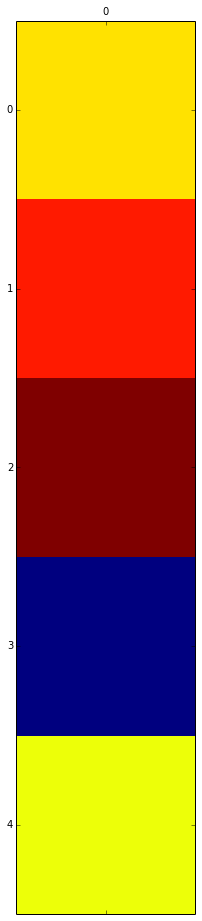

In [29]:
plt.matshow(x.cells[0].forget_layers[0].matrices[0].w)

In [33]:
?l.activate_sequence